# Ensemble Learning

# <h2> 1.Max Voting, Averaging & Weighted Average Voting --- Regression Practical </h2>

In [30]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [31]:
x,y=make_moons(n_samples=1000,noise=0.1)
x

array([[-0.83185946,  0.4758011 ],
       [ 1.94043448,  0.19417522],
       [-0.89719142,  0.51335775],
       ...,
       [ 0.86649307,  0.53076279],
       [-0.73140004,  0.42697515],
       [-0.79785857,  0.36271654]], shape=(1000, 2))

In [32]:
df={"x1":x[:,0],"x2":x[:,1],"y":y}

In [33]:
dataset=pd.DataFrame(df)
dataset

,x1,x2,y
0,-0.831859,0.475801,0
1,1.940434,0.194175,1
2,-0.897191,0.513358,0
3,-0.733335,0.457495,0
4,0.358349,0.868801,0
...,...,...,...
995,1.839014,-0.469545,1
996,0.100889,-0.058559,1
997,0.866493,0.530763,0
998,-0.731400,0.426975,0


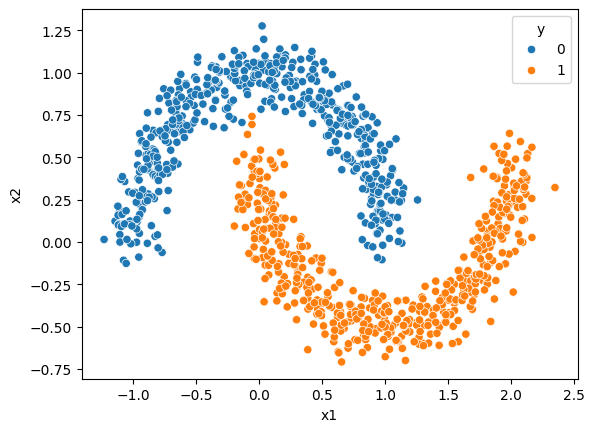

In [34]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [35]:
x_a=dataset.iloc[:,:-1]
y_a=dataset["y"]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,random_state=42,test_size=0.2)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [38]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 98.0)

In [39]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(100.0, 99.0)

In [40]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100, gnb.score(x_test,y_test)*100

(88.5, 85.5)

By using the Voting Classifier

In [41]:
from sklearn.ensemble import VotingClassifier

In [42]:
li=[("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]


In [43]:
vc=VotingClassifier(li)
vc.fit(x_train,y_train)

,estimators,"[('dt1', ...), ('sv1', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [44]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(100.0, 98.5)

In [45]:
prd={"dt":dt.predict(x_test),"svm":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}
pd.DataFrame(prd)


,dt,svm,gnb,vc
0,1,1,1,1
1,0,0,0,0
2,0,0,0,0
3,0,0,1,0
4,1,1,1,1
...,...,...,...,...
195,0,0,0,0
196,0,0,0,0
197,0,0,0,0
198,0,0,0,0


# <h2> 2.Max Voting, Averaging & Weighted Average Voting --- Classification Practical </h2>

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data=pd.read_csv(r"C:\Users\Shaik.AbdulRazak\OneDrive\Documents\Raw data\placement_data.csv")
data.head()

,Cgpa,Package
0,6.87,12.21
1,9.75,22.55
2,8.66,24.33
3,7.99,20.76
4,5.78,15.66


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,random_state=42,test_size=0.2)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [61]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(65.57142284403032, 62.743288226182806)

In [62]:
dt1=DecisionTreeRegressor()
dt1.fit(x_train,y_train)
dt1.score(x_train,y_train)*100, dt1.score(x_test,y_test)*100

(100.0, 91.91919191919192)

In [63]:
sv1=SVR()
sv1.fit(x_train,y_train)
sv1.score(x_train,y_train)*100, sv1.score(x_test,y_test)*100

(96.60637661206279, 95.18241099293914)

In [65]:
from sklearn.ensemble import VotingRegressor
li=[("lr2",LinearRegression()),("dt2",DecisionTreeRegressor()),("sv2",SVR())]

In [73]:
vr = VotingRegressor(li) # vr = VotingRegressor(li,weights=[10,20,30])
vr.fit(x_train,y_train)


,estimators,"[('lr2', ...), ('dt2', ...), ...]"
,weights,None
,n_jobs,None
,verbose,False
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
,criterion,'squared_error'
,splitter,'best'


In [74]:
vr.score(x_train,y_train)*100, vr.score(x_test,y_test)*100

(95.30710502471229, 91.57211263723532)

In [75]:
prd1={"lr":dt.predict(x_test),"dt1":dt1.predict(x_test),"svm":sv1.predict(x_test),"vr":vr.predict(x_test)}
pd.DataFrame(prd1)


,lr,dt1,svm,vr
0,1,1.0,1.120958,1.082180
1,0,0.0,-0.055560,0.063408
2,0,0.0,0.007521,0.086035
3,0,0.0,0.044880,0.223730
4,1,1.0,1.056495,0.995873
...,...,...,...,...
195,0,0.0,-0.025936,-0.025016
196,0,0.0,-0.032958,0.045239
197,0,0.0,-0.102187,-0.034719
198,0,0.0,-0.043742,-0.046809


In [76]:
(1.0+1.120958+1.082180)/3

1.0677126666666668